## Predicting Survival in the Titanic Data Set
## We will use decision tree to make predictions about the Titanic data set from Kaggle. 
## The data set provides information on the Titanic passengers.
## It can be used to predict whether a passenger survived or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import pickle

In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic_orig = pd.read_csv(url)

In [3]:
titanic_orig.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Taking the rquired columns suggested in the assignment

titanic = titanic_orig[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [5]:
titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [6]:
titanic.shape

(891, 7)

In [7]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


## Exploratory Data Analysis

In [9]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic['Sex']  = titanic['Sex'].map( {'male': 0, 'female': 1} ).astype(int)



C:\Users\Nabeel Fahmi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


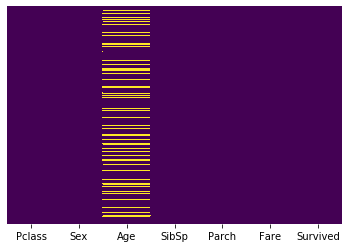

In [13]:
#Visualising nulls in the dataset
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [14]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

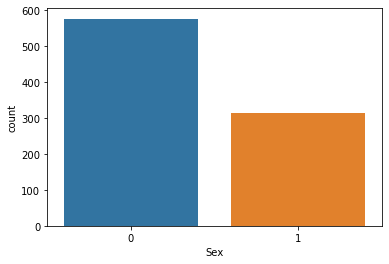

In [15]:
sns.countplot(titanic['Sex'])

## There are almost 50% more males than females

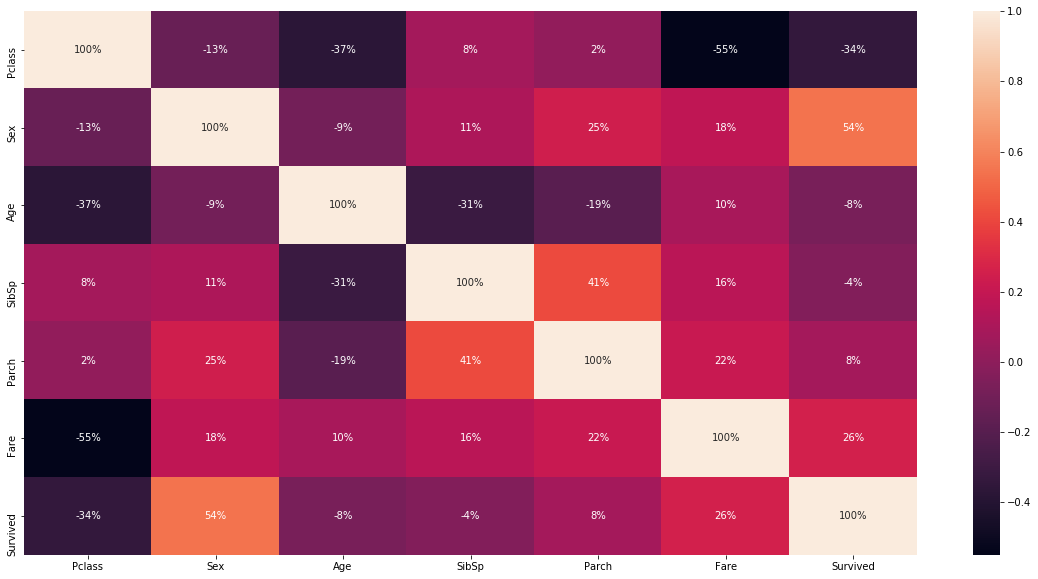

In [16]:
# let visualise correlations between features 

plt.figure(figsize=(20,10))
sns.heatmap(titanic.corr(),annot=True,fmt= '.0%')

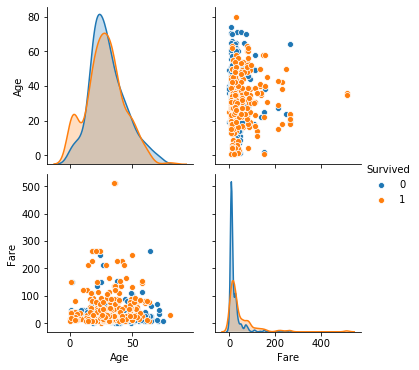

In [17]:
#Let us concentrate on the 'Age' and 'Fare' numerical features only

# Lest see the correlation between Forecast columns
features = ['Age','Fare']
            
sns.pairplot(titanic, vars = features, hue= 'Survived')


# Show the plot
plt.show()

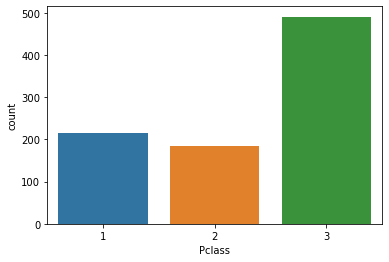

In [18]:
sns.countplot(titanic['Pclass'])

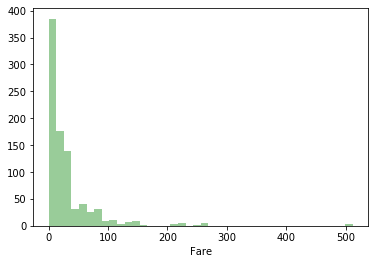

In [19]:
sns.distplot(titanic['Fare'].dropna(),kde=False, color='green',bins=40)

#### The above plot the distribution is dense over 0 to 40.

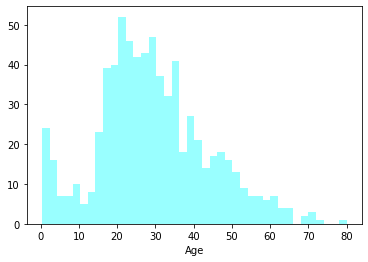

In [20]:
sns.distplot(titanic['Age'].dropna(),kde=False, color='cyan',bins=40)

## The distribution of age seems to be normally distributed except few outliers

In [21]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

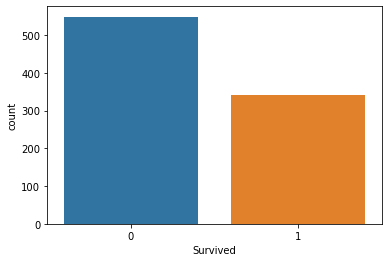

In [22]:
sns.countplot(titanic['Survived'])

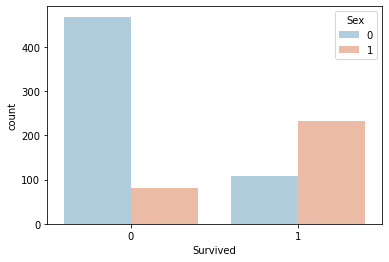

In [23]:
sns.countplot(x='Survived',hue='Sex', data= titanic,palette='RdBu_r')

### overall the wuvial is less in males

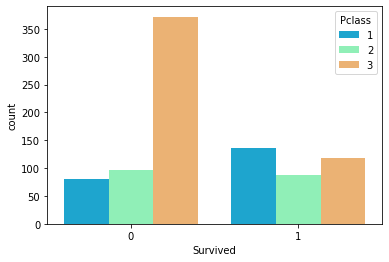

In [24]:
sns.countplot(x='Survived',hue='Pclass', data= titanic,palette='rainbow')

### The survival and non surival is uneven across the passenger class 

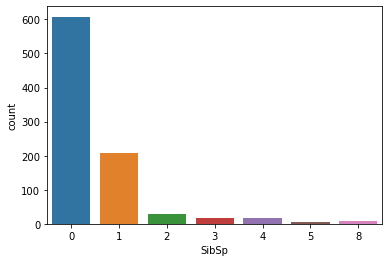

In [25]:
sns.countplot(titanic['SibSp'])

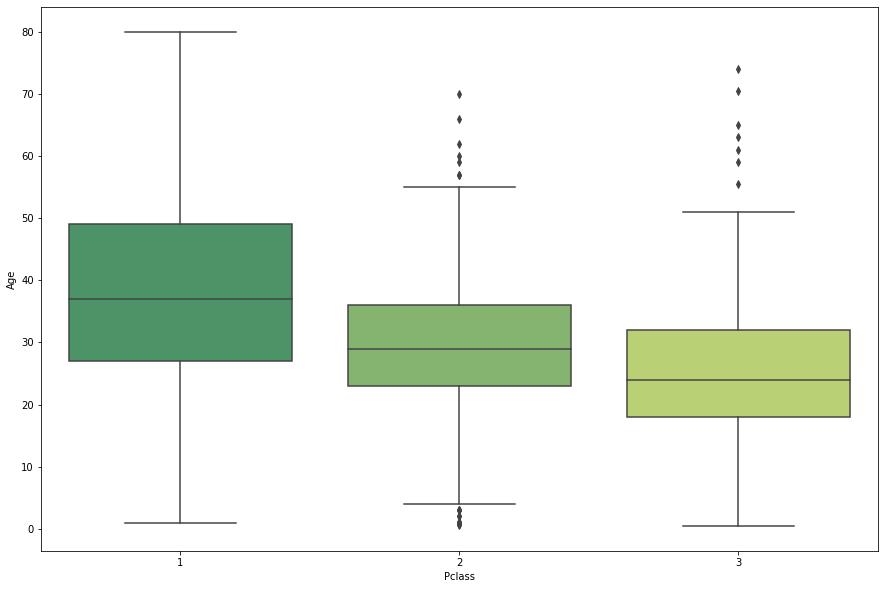

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='summer')

In [27]:
## To impute the null values of Age feature , will use different median across the class, as seem in the box plot above

In [28]:
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 29
        
    else:
        return Age

In [29]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Nabeel Fahmi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


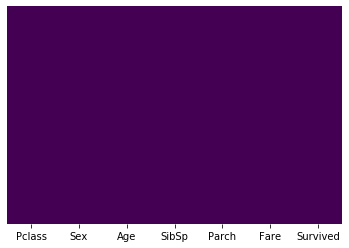

In [30]:
# Lets checlk the null matrix now:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [31]:
#Distribute the target and features
X = titanic.drop(columns='Survived')
y = titanic['Survived']

In [32]:
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [33]:
#Split the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

### Make the scaler objects to check if the model performance improves


In [34]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)

In [35]:
scaler_std = StandardScaler()
x_scaled_std = scaler_std.fit_transform(x_train)

In [36]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
clf.score(x_train,y_train)

0.9839486356340289

In [38]:
y_pred = clf.predict(x_test)

In [39]:
accuracy_cm = confusion_matrix(y_test,y_pred)
accuracy_cm

array([[134,  37],
       [ 26,  71]], dtype=int64)

In [40]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.7649253731343284

In [41]:
clf.score(x_test,y_test)

0.7649253731343284

## Model accuracy on test data is achieved to be around 74.25%

## Now we will train the model using scaled features

In [42]:
clf.fit(x_scaled,y_train)

DecisionTreeClassifier()

In [43]:
clf.score(x_scaled,y_train)

0.9839486356340289

In [44]:
# accuracy of our classification tree
clf.score(scaler.fit_transform(x_test),y_test)

0.7350746268656716

## Oops there is a reduction in accuracy. lets try with StandardScaler()

In [45]:
clf.fit(x_scaled_std,y_train)

DecisionTreeClassifier()

In [46]:
clf.score(x_scaled_std,y_train)

0.9839486356340289

In [47]:
# accuracy of our classification tree
clf.score(scaler_std.fit_transform(x_test),y_test)

0.7201492537313433

## The model seems to work well without scaling

# Hyperparameter Tuning

In [48]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [49]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [51]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [52]:
grid_search.best_score_

0.8250580645161291

In [53]:
clf_modified = DecisionTreeClassifier(criterion =  'entropy', max_depth= 6,min_samples_leaf= 2, min_samples_split= 9, splitter='random')

In [54]:
clf_modified.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=9, splitter='random')

In [55]:
clf_modified.score(x_train,y_train)

0.8282504012841091

In [56]:
clf_modified.score(x_test,y_test)

0.7985074626865671

### Even though it shows less accuracy on train dataset, it has improved substantially on unseen test dataset.

In [57]:
y_pred_mod = clf_modified.predict(x_test)

In [58]:
y_test[0:10]

426    1
302    0
383    1
355    0
678    0
88     1
485    0
238    0
424    0
212    0
Name: Survived, dtype: int64

In [59]:
y_pred_mod[0:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

### Looks good. Now will pickle this model

In [60]:
with open('./modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf_modified,f)
    

In [61]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [62]:
xnew = np.array([3,0,35,0,0,8.05])

In [63]:
ynew = clf_modified.predict(xnew.reshape(1,-11))

In [64]:
ynew[0]

0